#  Linear Regression (logarithmic rate of return)

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
import sklearn.metrics as metrics

### Uploading data

In [2]:
url = "https://raw.githubusercontent.com/Agablue-red/Machine-Learning/master/data/dataset_ln_rate.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,symbol,sector,score,date,close,return_rate
0,SU,Energy Minerals,0.953727,2004-02-11,13.285000,0.008314
1,GGG,Producer Manufacturing,0.952753,2004-02-11,9.388889,0.011665
2,CWT,Utilities,0.934181,2004-02-11,14.720000,0.004767
3,BLL,Process Industries,0.922862,2004-02-11,8.095000,0.002783
4,APA,Energy Minerals,0.912117,2004-02-11,39.830002,0.005791


In [4]:
nan_rows = data[data['return_rate'].isnull()]
if nan_rows.symbol.nunique() == len(nan_rows):
    print("NaN for first period")


NaN for first period


Replacing NaNs with 0 value:

In [5]:
data['return_rate'] = data['return_rate'].fillna(0)

Looking at the tail of the data, meaning the newest observations:

In [6]:
data.tail()

,symbol,sector,score,date,close,return_rate
30232,PEP,Consumer Non-Durables,0.701507,2022-02-09,171.940002,-0.000465
30233,SSNC,Technology Services,0.701123,2022-02-09,82.419998,0.020718
30234,GEF,Process Industries,0.697954,2022-02-09,56.930000,-0.016549
30235,DPZ,Consumer Services,0.697741,2022-02-09,444.760010,0.013651
30236,LIFZF,Non-Energy Minerals,0.695644,2022-02-09,34.410000,0.024714


### Information about dataset

Data types:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30237 entries, 0 to 30236
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       30237 non-null  object 
 1   sector       30237 non-null  object 
 2   score        30237 non-null  float64
 3   date         30237 non-null  object 
 4   close        30237 non-null  float64
 5   return_rate  30237 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.4+ MB


Checking if there is any lack of data:

In [8]:
data.isnull().sum()

symbol         0
sector         0
score          0
date           0
close          0
return_rate    0
dtype: int64

Changing the type of 'date' variable:

In [9]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data = data.set_index('date')

#### Fundamental statistics on numeric variables

In [10]:
data.describe()

,score,close,return_rate
count,30237.000000,30237.000000,30237.000000
mean,0.731151,100.004819,0.000359
std,0.117728,2570.896942,0.020784
min,0.413554,0.020000,-0.470004
25%,0.653611,26.097500,-0.008011
50%,0.741462,44.730000,0.000228
75%,0.813387,74.300003,0.009173
max,0.987225,441225.000000,0.470004


There are in total 30 237 observations. The mean score for this dataset is 0,73, mean closing price is 100 and mean return rate is 0,0004.

In [11]:
data.symbol.value_counts()

SHW     169
GEF     140
ORLY    138
INGR    122
GPC     122
       ... 
MRVL      1
VCTR      1
YELL      1
HOV       1
VIVO      1
Name: symbol, Length: 1330, dtype: int64

There are 1330 companies in total, some of them occur only once in the time series and some even over 100 times. 

### Splitting the data into training and testing sets

Training set involves data from 2010 to 2020 and testing set includes the year 2021.


In [12]:
X_train = data['2010':'2020'].drop(['symbol','sector','return_rate', 'close'], axis = 1)
y_train = data.loc['2010':'2020', 'return_rate']

X_test = data['2021'].drop(['symbol','sector','return_rate', 'close'], axis = 1)
y_test = data.loc['2021', 'return_rate']

<ipython-input-12-e0a87765a94e>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data['2021'].drop(['symbol','sector','return_rate', 'close'], axis = 1)


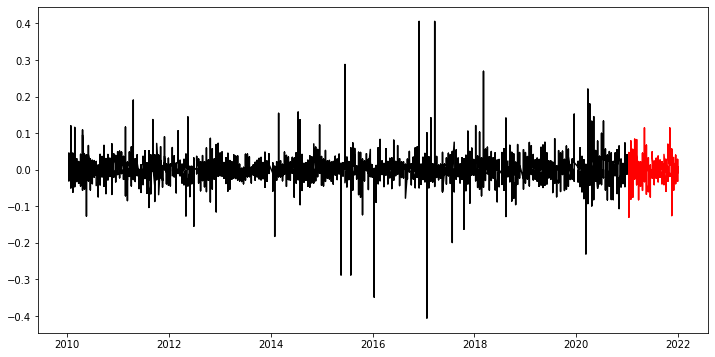

In [13]:
fig, ax=plt.subplots(figsize=(12, 6))

plt.plot(y_train, color = "black")
plt.plot(y_test, color = "red")

In [14]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (19498, 1)
Number transactions y_train dataset:  (19498,)
Number transactions X_test dataset:  (2045, 1)
Number transactions y_test dataset:  (2045,)


### Dummy regression

In [15]:
from sklearn.dummy import DummyRegressor

In [16]:
# train model
reg_dummy = DummyRegressor(strategy = 'mean').fit(X_train, y_train) 

print('Coefficient of determination:', reg_dummy.score(X_train, y_train))

Coefficient of determination: 0.0


0% represents a model that does not explain any of the variation in the response variable around its mean.

In [17]:
# predict & evaluate
y_pred_dum = reg_dummy.predict(X_test)

print("Coefficient of determination (R2): %.5f" % r2_score(y_test , y_pred_dum) )
print("Mean absolute error (MAE): %.5f" % np.mean(np.absolute(y_pred_dum - y_test)))
print("Residual sum of squares (MSE): %.5f" % mean_squared_error(y_test, y_pred_dum))
print("Root mean squared error (RMSE): %.5f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)))

Coefficient of determination (R2): -0.00043
Mean absolute error (MAE): 0.01345
Residual sum of squares (MSE): 0.00038
Root mean squared error (RMSE): 0.01952


### Linear regression

In [18]:
from sklearn import metrics

# train model
lm = LinearRegression().fit(X_train, y_train)

print('Coefficient of determination:', lm.score(X_train, y_train))
print('Intercept:', lm.intercept_)
print('Slope:', lm.coef_)

Coefficient of determination: 0.002063735575619896
Intercept: 0.005969336426938953
Slope: [-0.00769272]


f(x) = b₁x + b₀

f(x) = - 0.008x + 0.006

𝑅² = 0.0021

Model explains only 0.0021 of the variation in the response variable around its mean.

**Measure of fit of a model**

In [19]:
# predict & evaluate
y_pred = lm.predict(X_test)

print('predicted response:', y_pred, sep='\n')

print("Coefficient of determination (R2): %.5f" % r2_score(y_test , y_pred) )
print("Mean absolute error (MAE): %.5f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.5f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error (RMSE): %.5f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted response:
[-0.00109287 -0.00096759 -0.00092766 ...  0.00049922  0.00050799
  0.00051727]
Coefficient of determination (R2): -0.00584
Mean absolute error (MAE): 0.01353
Residual sum of squares (MSE): 0.00038
Root mean squared error (RMSE): 0.01957


Adjusted R squared  is adjusted for the number of independent variables in the model and equal -0.00584 (adjusted  R² will always be less than or equal to R²).

The average of the residuals equal 0.01353

The variance of the residuals equal 0.00038

The standard deviation of residuals equal 0.01957

### Comparison between dummy regression and linear regression in combination with observations from test set.

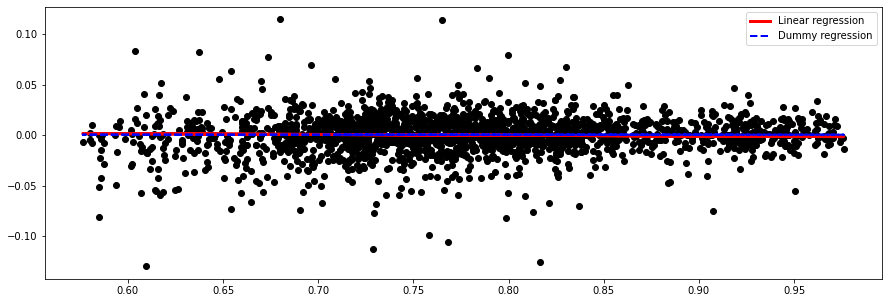

In [20]:
fig, ax=plt.subplots(figsize=(15, 5))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linear regression')
plt.plot(X_test, y_pred_dum, color='blue', linestyle = 'dashed', linewidth=2, label = 'Dummy regression')
ax.legend()

Model does not explain any of the variation in the response variable around its mean.

Linear regression is marginally better than dummy regression.

Both models are not well fit.